Sos un prestigioso consultor de la polis de Atenas, y has sido contratado para asesorar a Alexandros, un talentoso zapatero que está teniendo dificultades para gestionar su creciente carga de trabajo. Alexandros es famoso por su habilidad para reparar las sandalias de los ciudadanos y los héroes que pisan las ágoras y los templos de la ciudad. Cada amanecer, el Oráculo de Delfos tira un astrágalo (un dado de hueso rojo) y revela cuántas sandalias rotas los atenienses te entregarán para reparar. Por la tarde, el Oráculo tira otro astrágalo (esta vez, uno azul) para determinar cuántas sandalias podrás reparar antes de que Helios se retire en su carro de fuego al Oeste.

Para mantener un registro de su labor y asegurarte de que ningún ciudadano espere demasiado por sus sandalias, decidís consultar los antiguos papiros y hacer cálculos sobre sus actividades diarias.

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd

random.seed(42)

In [2]:
dias_a_simular = 365

In [4]:
# Inicializo la cantidad de sandalias rotas y sandalias arregladas
sandalias_rotas = 0
sandalias_arregladas = 0

# Creo un DataFrame vacío para almacenar los resultados
columnas = ["Día", "Nuevas sandalias rotas", "Sandalias a arreglar hoy", "Sandalias reparadas hoy", "Sandalias rotas pendientes", "Total sandalias arregladas"]
registro_dias = pd.DataFrame(columns=columnas)

pendientes = []

# Simulo
for dia in range(1, dias_a_simular + 1):
    # El oráculo tira un astrágalo rojo para determinar cuántas sandalias rotas llegan
    nuevas_sandalias_rotas = random.randint(1, 6)
    sandalias_rotas += nuevas_sandalias_rotas
    
    # El oráculo tira un astrágalo azul para determinar cuántas sandalias se pueden arreglar
    sandalias_a_arreglar_hoy = random.randint(1, 8)
    
    # Arreglar las sandalias, no podemos arreglar más sandalias de las que tenemos
    sandalias_reparadas_hoy = min(sandalias_rotas, sandalias_a_arreglar_hoy)
    sandalias_rotas -= sandalias_reparadas_hoy
    sandalias_arregladas += sandalias_reparadas_hoy
    
    # Agregar datos al DataFrame
    registro_dias.loc[dia] = [dia, nuevas_sandalias_rotas, sandalias_a_arreglar_hoy, sandalias_reparadas_hoy, sandalias_rotas, sandalias_arregladas]
    
    # Almacenar datos para el gráfico
    pendientes.append(sandalias_rotas)

In [5]:
registro_dias.head()

,Día,Nuevas sandalias rotas,Sandalias a arreglar hoy,Sandalias reparadas hoy,Sandalias rotas pendientes,Total sandalias arregladas
1,1,6,8,6,0,6
2,2,4,1,1,3,7
3,3,1,5,4,0,11
4,4,2,7,2,0,13
5,5,6,4,4,2,17


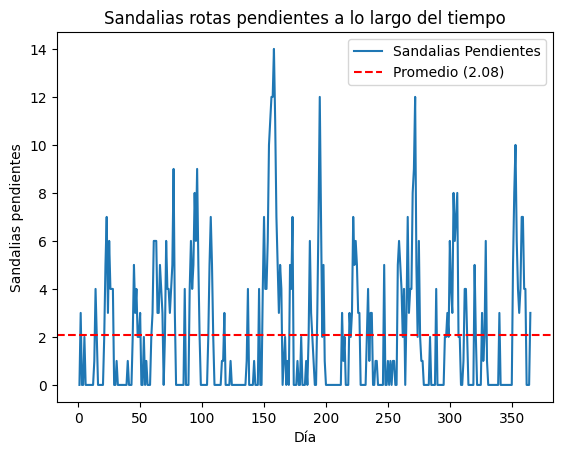

In [6]:
promedio_pendientes = sum(pendientes) / len(pendientes)

plt.plot(registro_dias["Día"], pendientes, label='Sandalias Pendientes')
plt.axhline(y=promedio_pendientes, color='r', linestyle='--', label=f'Promedio ({promedio_pendientes:.2f})')
plt.title("Sandalias rotas pendientes a lo largo del tiempo")
plt.xlabel("Día")
plt.ylabel("Sandalias pendientes")
plt.legend()
plt.show()

